In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Prettier plots
%config InlineBackend.figure_format = 'svg'

sns.set_context("notebook")
sns.set(style="ticks", font="Latin Modern Math")

In [3]:
datapath = "../datasett/fifa-20-complete-player-dataset/players_20.csv"
player_data_all = pd.read_csv(datapath)
player_data_all.sort_values('overall');

# Remove goalkeepers :(
player_data = player_data_all[player_data_all.loc[:, 'player_positions'] != 'GK']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
player_data = player_data.select_dtypes(include=numerics)
player_data = player_data.dropna(axis='columns')
player_data.head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
4,183277,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
5,192985,28,181,70,91,91,90000000,370000,4,5,...,79,91,68,58,51,15,13,5,10,13


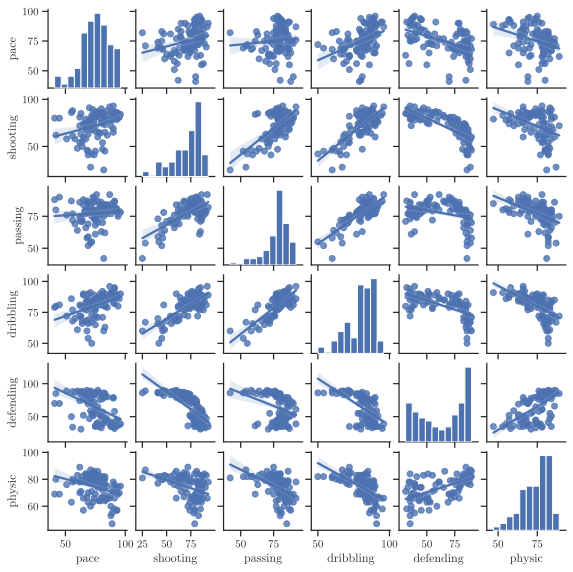

In [4]:
top_player_data = player_data.iloc[0:99, :]
sns.pairplot(top_player_data.loc[:, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']], height=1.3, aspect=1, kind='reg')

In [5]:
player_data_std = (player_data-player_data.mean(axis=0))/player_data.std(axis=0,ddof=1)

In [6]:
pca = PCA()
pca.fit(player_data_std)
P=pca.components_
T = player_data_std.dot(P.T)

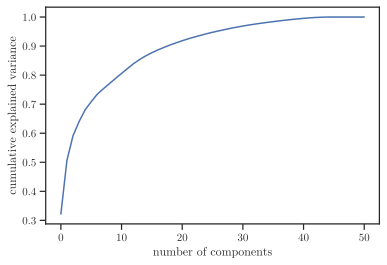

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
print("First component ", P.T[:,0])

First component  [-0.08607968  0.07169195 -0.08369751 -0.05206009  0.17491427  0.11727392
  0.1296923   0.11638992  0.10019367  0.08830487  0.18410314  0.11951196
  0.21464899  0.21960783  0.2311412  -0.03443142  0.01714318  0.18645882
  0.19479839  0.0080443   0.18911746  0.19750108  0.22107906  0.20778742
  0.18463991  0.15286189  0.22407138  0.12191283  0.11078152  0.1609699
  0.16423886  0.11971022  0.19237049  0.00382149  0.09375241 -0.02606682
  0.21041671  0.02144148 -0.02427576  0.20767736  0.21337184  0.1721698
  0.17469225 -0.02820725 -0.04203064 -0.04943591  0.00823031  0.01177101
  0.01316889  0.00880919  0.00918236]


In [12]:
skills = player_data.columns
pc1 = P.T[:, 0]
# Sort skills descending by absolute value of score in first principal component
sorted_skills = [y for x, y in sorted(zip(abs(pc1), skills))]
sorted_skills.reverse()
sorted_skills
#skill_importance_sorted = [skills[i]]

['dribbling',
 'skill_ball_control',
 'skill_dribbling',
 'passing',
 'shooting',
 'mentality_vision',
 'power_long_shots',
 'skill_curve',
 'mentality_positioning',
 'attacking_volleys',
 'attacking_finishing',
 'power_shot_power',
 'attacking_short_passing',
 'attacking_crossing',
 'skill_fk_accuracy',
 'skill_moves',
 'overall',
 'mentality_composure',
 'mentality_penalties',
 'movement_reactions',
 'movement_agility',
 'skill_long_passing',
 'value_eur',
 'movement_acceleration',
 'movement_balance',
 'pace',
 'potential',
 'wage_eur',
 'movement_sprint_speed',
 'international_reputation',
 'power_stamina',
 'weak_foot',
 'sofifa_id',
 'height_cm',
 'age',
 'weight_kg',
 'defending_sliding_tackle',
 'defending_standing_tackle',
 'defending',
 'defending_marking',
 'power_strength',
 'mentality_interceptions',
 'mentality_aggression',
 'physic',
 'goalkeeping_kicking',
 'goalkeeping_handling',
 'goalkeeping_reflexes',
 'goalkeeping_positioning',
 'goalkeeping_diving',
 'attacking_he